In [56]:
import numpy as np  
import pandas as pd  
import os
import cv2

In [57]:
labels = os.listdir("./Dataset")
print(labels)

['Closed', 'no_yawn', 'Open', 'yawn']


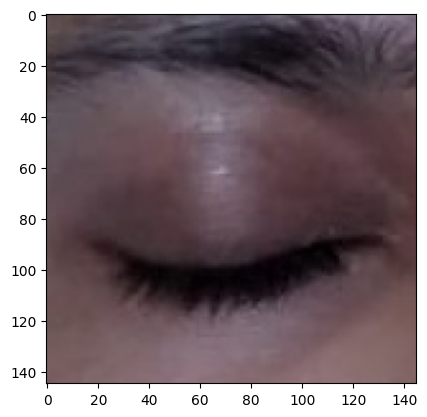

In [70]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
image_path = "./Dataset/Closed/_0.jpg"
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.show()

In [71]:
a = plt.imread("./Dataset/yawn/2.jpg")
print(a.shape)

(480, 640, 3)


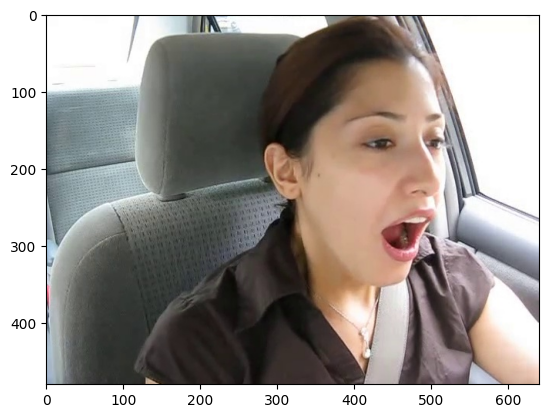

In [72]:
plt.imshow(plt.imread("./Dataset/yawn/2.jpg"))

In [79]:
def face_for_yawn(direc="./Dataset", face_cas_path="./archive/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(
                path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y),
                                    (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shap

In [80]:
def get_data(dir_path="./Dataset", face_cas="./archive/haarcascade_frontalface_default.xml", eye_cas="./archive/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num += 2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(
                    os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data


data_train = get_data()

2
3


In [81]:
def append_data():
    #     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)


new_data = append_data()

0
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shape: (145, 145, 3)
Resized Array Shap

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1925, 2) + inhomogeneous part.

In [82]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

NameError: name 'new_data' is not defined